# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
measles.data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here
df_vacc_rates = measles.data %>%
    filter(mmr >= 0) %>%
    group_by(state) %>%
    summarize(sum(mmr >= 95, na.rm = TRUE)/n())

df_vacc_rates %>% print(n = 52)

# A tibble: 21 × 2
   state         `sum(mmr >= 95, na.rm = TRUE)/n()`
   <chr>                                      <dbl>
 1 Arizona                                  0.506  
 2 Arkansas                                 0.00353
 3 California                               0.889  
 4 Colorado                                 0.623  
 5 Connecticut                              0.812  
 6 Illinois                                 0.897  
 7 Maine                                    0.473  
 8 Massachusetts                            0.866  
 9 Minnesota                                0.474  
10 Missouri                                 0.68   
11 Montana                                  0.709  
12 New York                                 0.860  
13 North Dakota                             0.456  
14 Ohio                                     0.492  
15 Oregon                                   0.593  
16 Pennsylvania                             0.835  
17 South Dakota                             0

Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

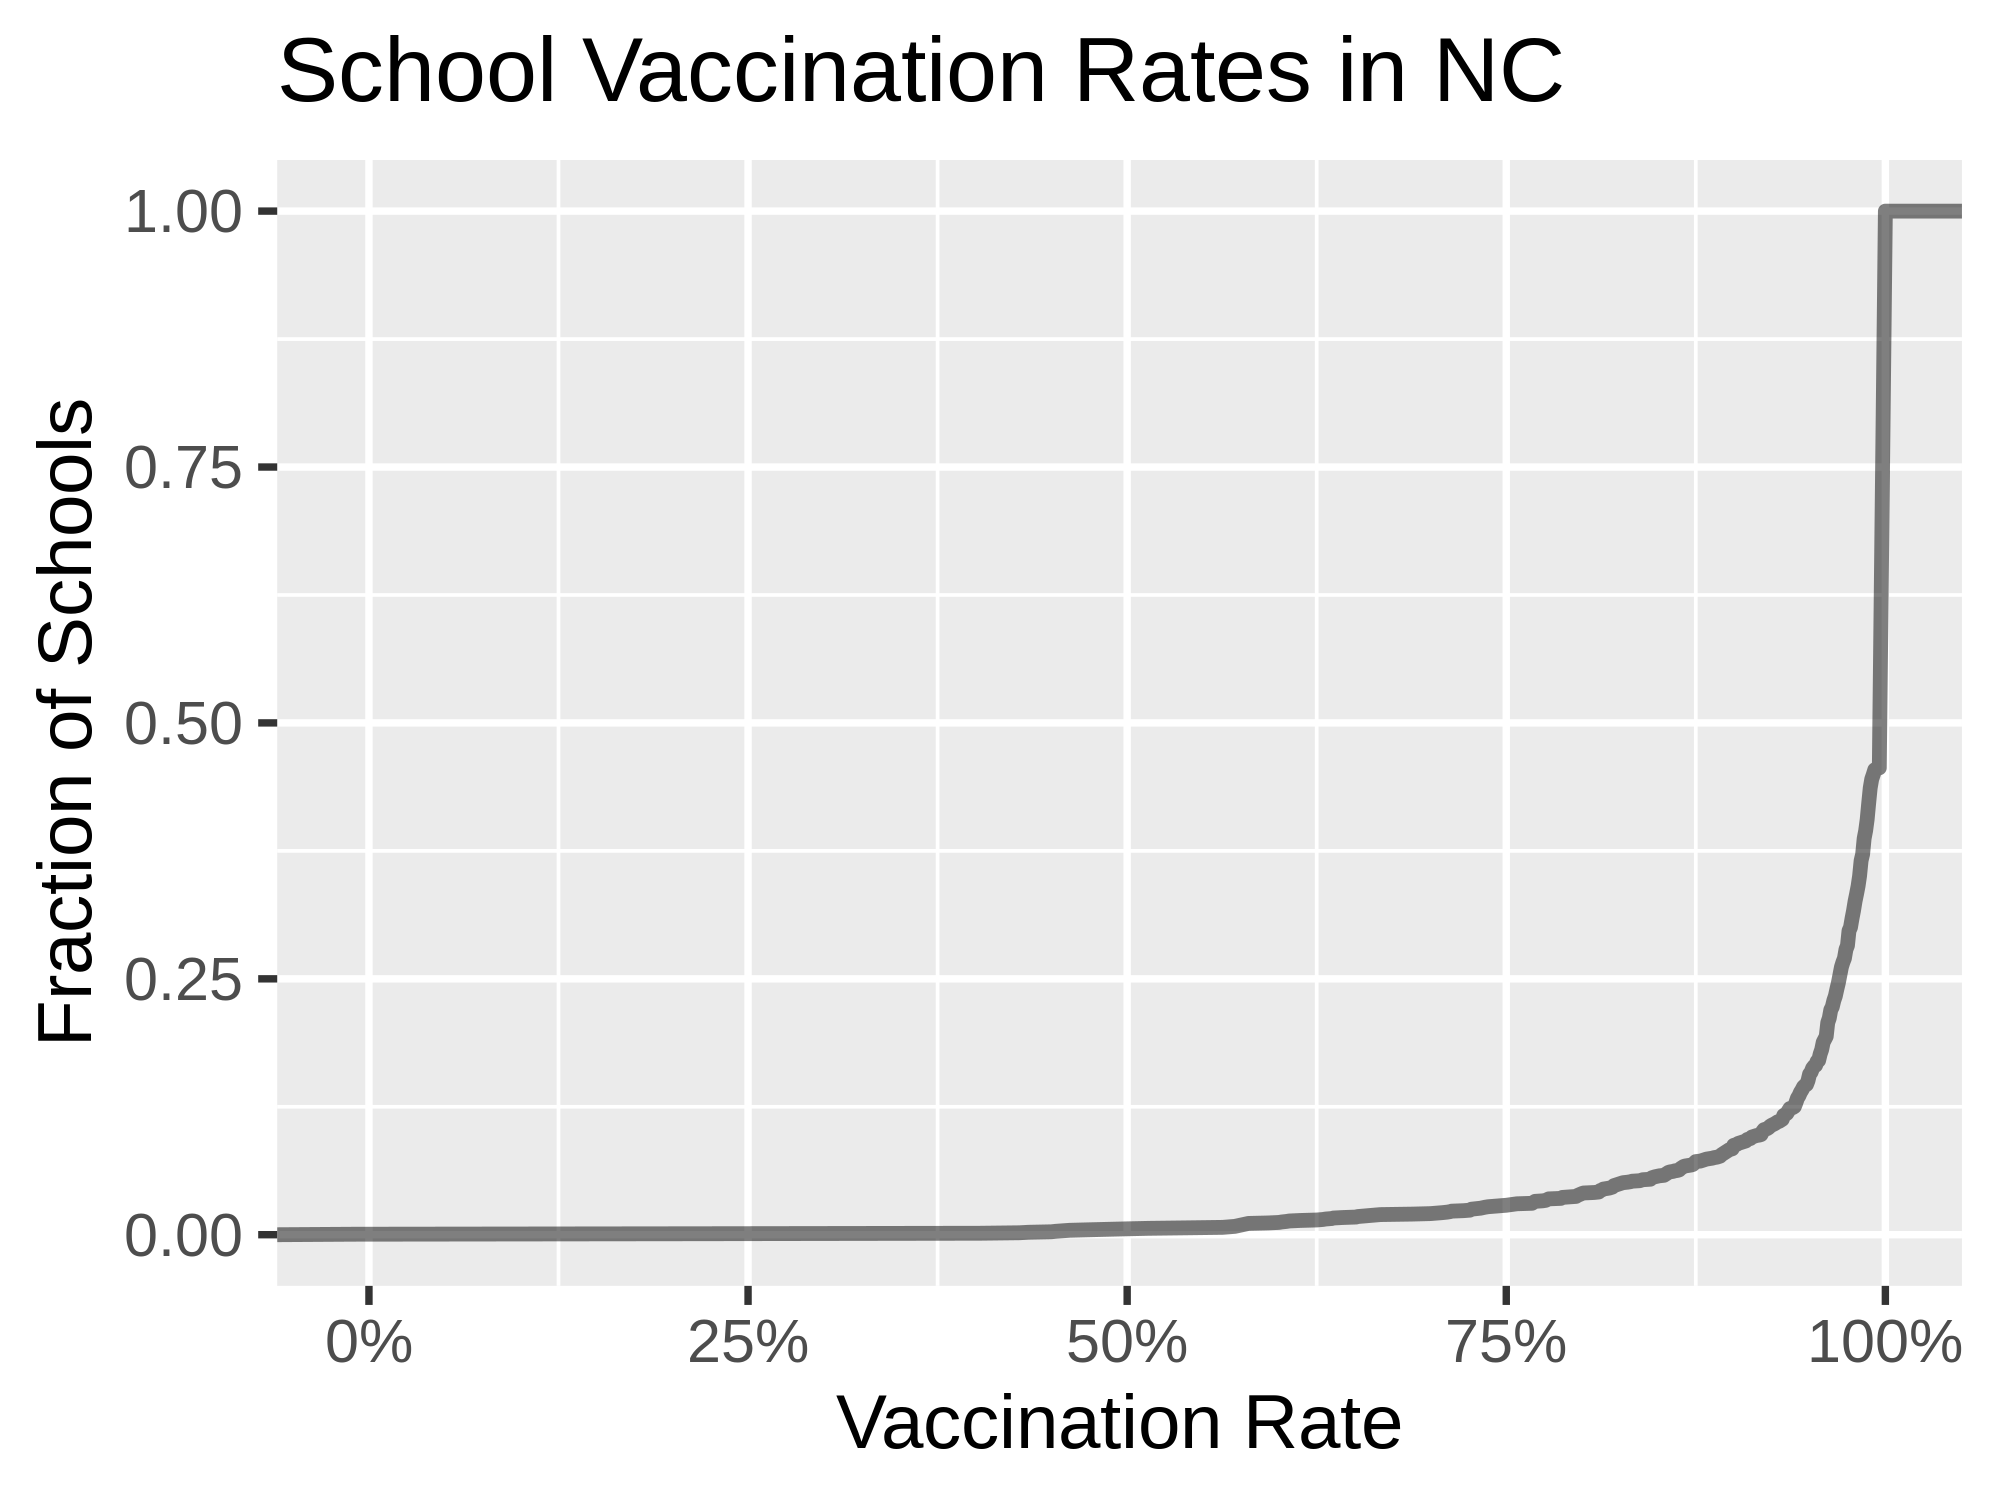

In [17]:
options(repr.plot.res = 500, repr.plot.height =3, repr.plot.width = 4)

p2 = measles.data %>%
    filter(state == 'North Carolina')

p = ggplot(p2, aes(x = overall))

p = p + stat_ecdf(geom = "line", size = 1, alpha = .5)+ scale_x_continuous(labels = scales::percent_format(scale = 1))

p = p +labs(title="School Vaccination Rates in NC",
        x ="Vaccination Rate", y = "Fraction of Schools")

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [22]:
median(p2$overall)

[1] 100

The median vaccination rate is over the CDC recommened target of 95%